Train: {'PNEUMONIA': 3875, 'NORMAL': 1341}
Val: {'PNEUMONIA': 8, 'NORMAL': 8}
Test: {'PNEUMONIA': 390, 'NORMAL': 234}


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


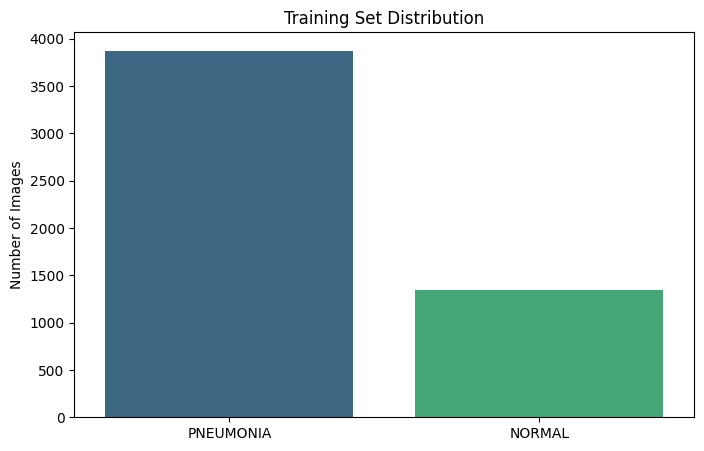

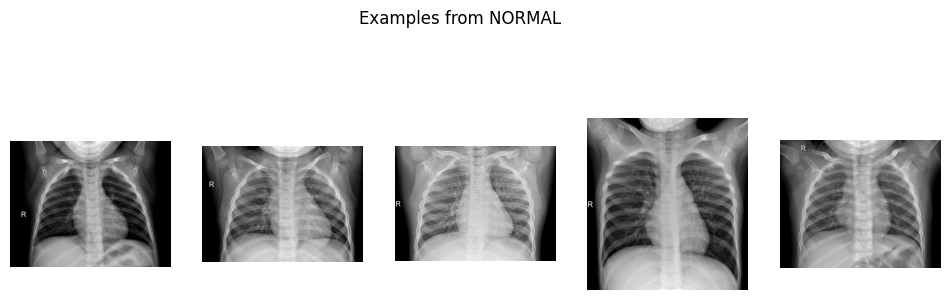

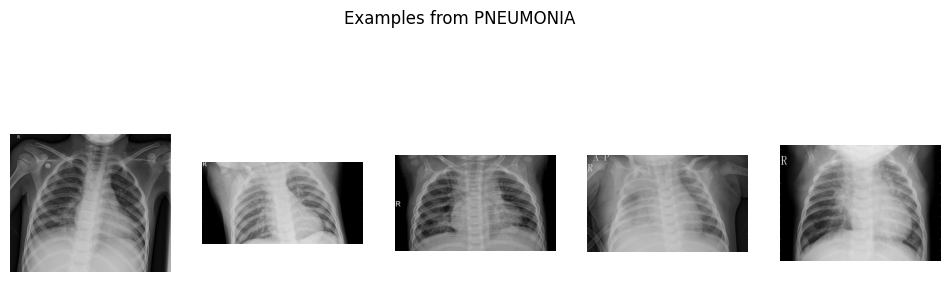

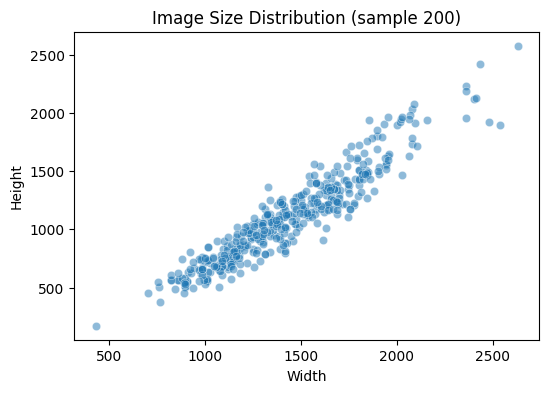

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

# Paths
train_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
val_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"
test_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"

# Function to count images
def count_images(folder):
    return {cls: len(os.listdir(os.path.join(folder, cls))) for cls in os.listdir(folder)}

train_counts = count_images(train_dir)
val_counts = count_images(val_dir)
test_counts = count_images(test_dir)

print("Train:", train_counts)
print("Val:", val_counts)
print("Test:", test_counts)

# Plot class distribution
plt.figure(figsize=(8,5))
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette="viridis")
plt.title("Training Set Distribution")
plt.ylabel("Number of Images")
plt.show()

# Show sample images
def show_samples(folder, cls, n=5):
    path = os.path.join(folder, cls)
    imgs = random.sample(os.listdir(path), n)
    plt.figure(figsize=(12,4))
    for i, img in enumerate(imgs):
        img_path = os.path.join(path, img)
        image = Image.open(img_path)
        plt.subplot(1,n,i+1)
        plt.imshow(image, cmap="gray")
        plt.axis("off")
    plt.suptitle(f"Examples from {cls}")
    plt.show()

show_samples(train_dir, "NORMAL")
show_samples(train_dir, "PNEUMONIA")

# Check image sizes
sizes = []
for cls in os.listdir(train_dir):
    path = os.path.join(train_dir, cls)
    for img_name in os.listdir(path)[:200]:  # sample 200
        img = Image.open(os.path.join(path, img_name))
        sizes.append(img.size)

w, h = zip(*sizes)
plt.figure(figsize=(6,4))
sns.scatterplot(x=w, y=h, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution (sample 200)")
plt.show()